In [28]:

import numpy as np
import pandas as pd 

import os

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score

from xgboost import XGBClassifier

import warnings
warnings.filterwarnings('ignore')

In [30]:
# load the data set
df = pd.read_csv('./data/oral_cancer_prediction_dataset.csv')
df.head()

,ID,Country,Age,Gender,Tobacco Use,Alcohol Consumption,HPV Infection,Betel Quid Use,Chronic Sun Exposure,Poor Oral Hygiene,...,Difficulty Swallowing,White or Red Patches in Mouth,Tumor Size (cm),Cancer Stage,Treatment Type,"Survival Rate (5-Year, %)",Cost of Treatment (USD),Economic Burden (Lost Workdays per Year),Early Diagnosis,Oral Cancer (Diagnosis)
0,1,Italy,36,Female,Yes,Yes,Yes,No,No,Yes,...,No,No,0.000000,0,No Treatment,100.000000,0.00,0,No,No
1,2,Japan,64,Male,Yes,Yes,Yes,No,Yes,Yes,...,No,No,1.782186,1,No Treatment,83.340103,77772.50,177,No,Yes
2,3,UK,37,Female,No,Yes,No,No,Yes,Yes,...,No,Yes,3.523895,2,Surgery,63.222871,101164.50,130,Yes,Yes
3,4,Sri Lanka,55,Male,Yes,Yes,No,Yes,No,Yes,...,No,No,0.000000,0,No Treatment,100.000000,0.00,0,Yes,No
4,5,South Africa,68,Male,No,No,No,No,No,Yes,...,No,No,2.834789,3,No Treatment,44.293199,45354.75,52,No,Yes


In [31]:
# check basic info to see column dtypes and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84922 entries, 0 to 84921
Data columns (total 25 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   ID                                        84922 non-null  int64  
 1   Country                                   84922 non-null  object 
 2   Age                                       84922 non-null  int64  
 3   Gender                                    84922 non-null  object 
 4   Tobacco Use                               84922 non-null  object 
 5   Alcohol Consumption                       84922 non-null  object 
 6   HPV Infection                             84922 non-null  object 
 7   Betel Quid Use                            84922 non-null  object 
 8   Chronic Sun Exposure                      84922 non-null  object 
 9   Poor Oral Hygiene                         84922 non-null  object 
 10  Diet (Fruits & Vegetables Intake) 

In [32]:
# check the shape to get an idea of how large the dataset is
df.shape

(84922, 25)

In [33]:
# check for missing values 
df.isnull().sum()

ID                                          0
Country                                     0
Age                                         0
Gender                                      0
Tobacco Use                                 0
Alcohol Consumption                         0
HPV Infection                               0
Betel Quid Use                              0
Chronic Sun Exposure                        0
Poor Oral Hygiene                           0
Diet (Fruits & Vegetables Intake)           0
Family History of Cancer                    0
Compromised Immune System                   0
Oral Lesions                                0
Unexplained Bleeding                        0
Difficulty Swallowing                       0
White or Red Patches in Mouth               0
Tumor Size (cm)                             0
Cancer Stage                                0
Treatment Type                              0
Survival Rate (5-Year, %)                   0
Cost of Treatment (USD)           

In [34]:
# check for duplicated values 
df.duplicated().sum()

np.int64(0)

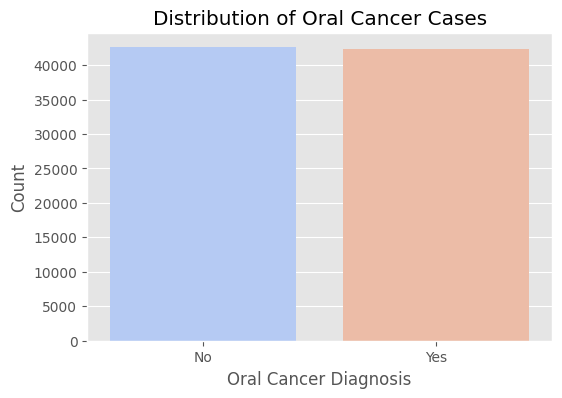

In [35]:
# we check the distribution of the target variable
# Set plot style
plt.style.use("ggplot")

# Plot distribution of target variable
plt.figure(figsize=(6, 4))
sns.countplot(x=df["Oral Cancer (Diagnosis)"], palette="coolwarm")

# Add labels and title
plt.xlabel("Oral Cancer Diagnosis")
plt.ylabel("Count")
plt.title("Distribution of Oral Cancer Cases")
plt.show()

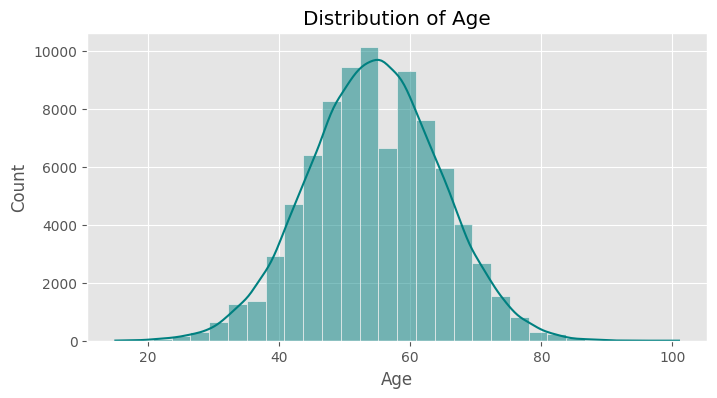

In [36]:
# age distribution
plt.figure(figsize=(8, 4))
sns.histplot(df["Age"], bins=30, kde=True, color="teal")
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Distribution of Age")
plt.show()

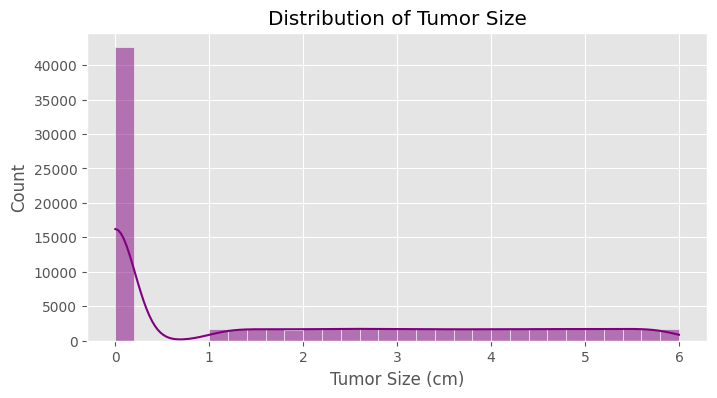

In [37]:
# tumor size distribution
plt.figure(figsize=(8, 4))
sns.histplot(df["Tumor Size (cm)"], bins=30, kde=True, color="purple")
plt.xlabel("Tumor Size (cm)")
plt.ylabel("Count")
plt.title("Distribution of Tumor Size")
plt.show()

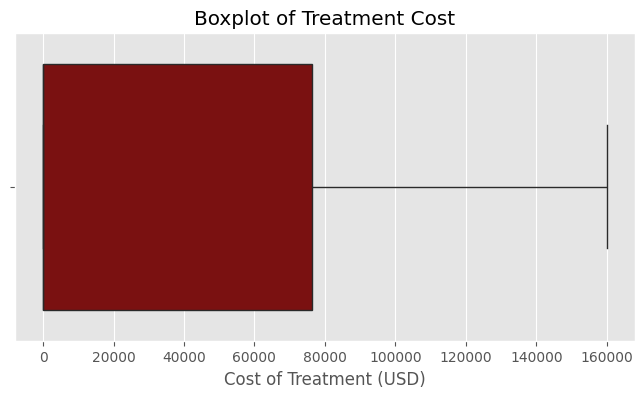

In [38]:
# boxplot of cost treatment
plt.figure(figsize=(8, 4))
sns.boxplot(x=df["Cost of Treatment (USD)"], color="darkred")
plt.xlabel("Cost of Treatment (USD)")
plt.title("Boxplot of Treatment Cost")
plt.show()

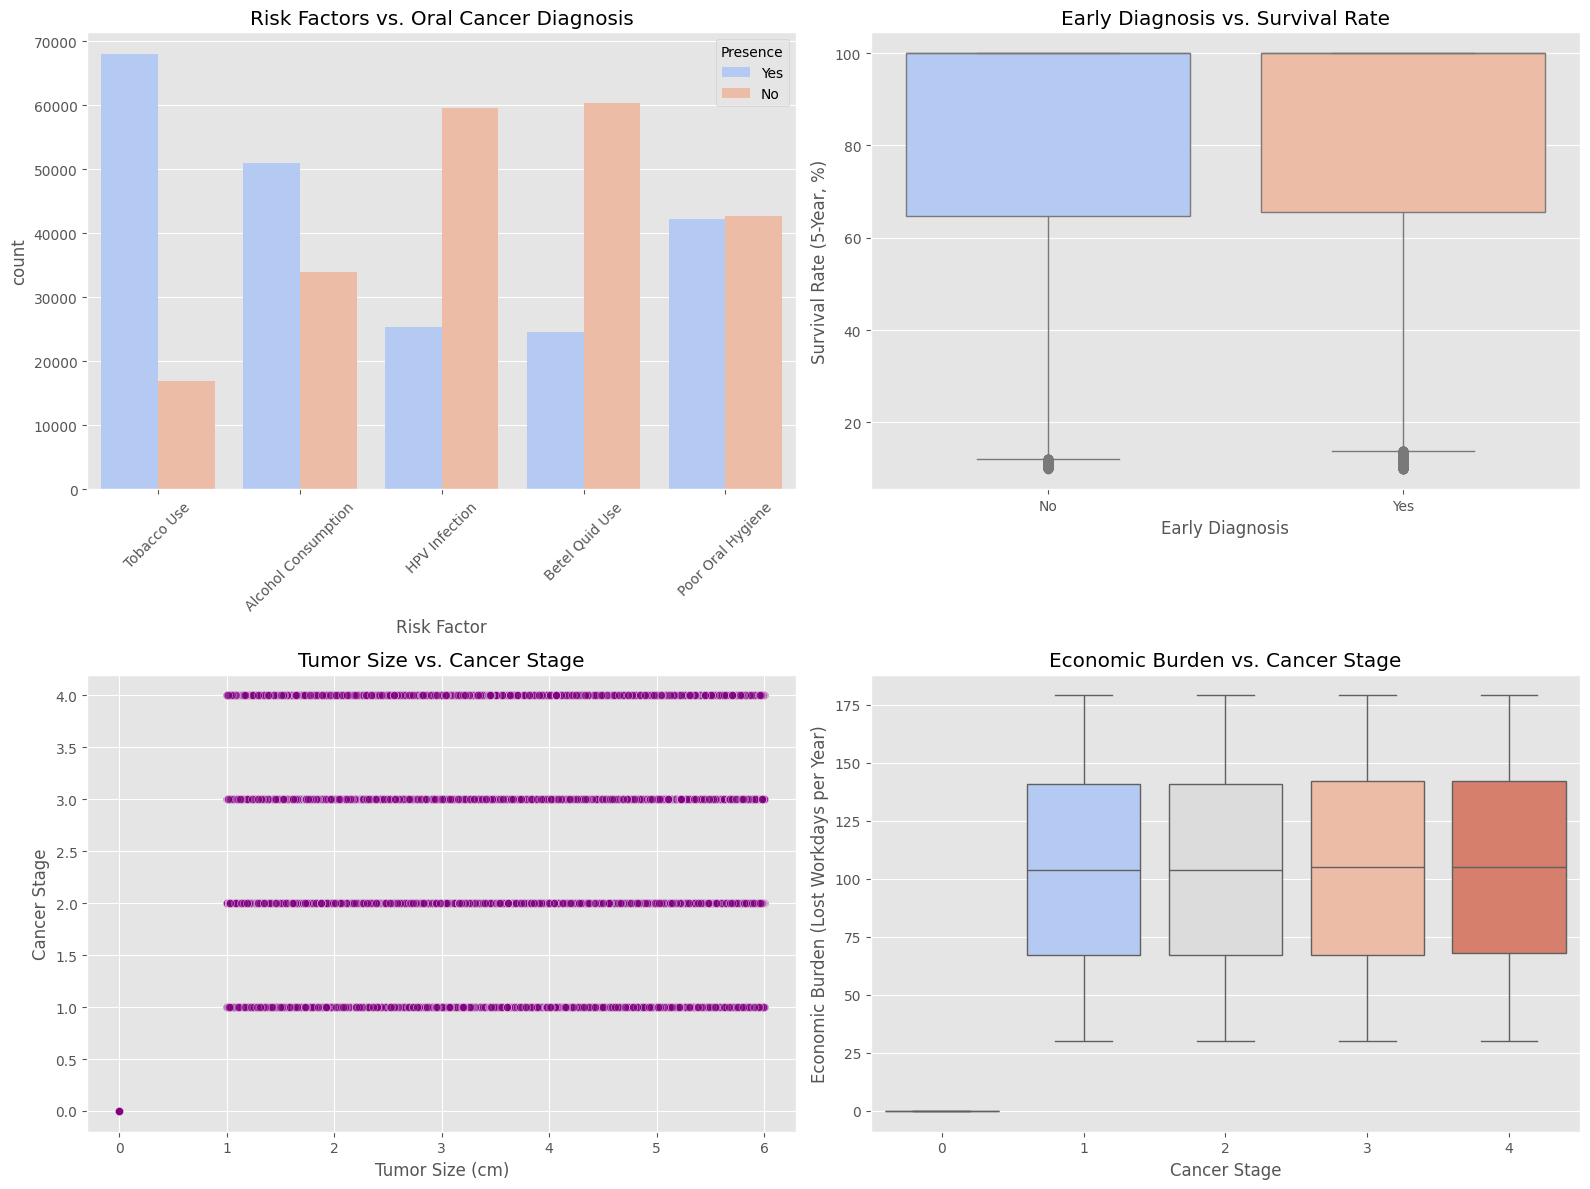

In [39]:
plt.figure(figsize=(16, 12))

plt.subplot(2, 2, 1)
risk_factors = ["Tobacco Use", "Alcohol Consumption", "HPV Infection", "Betel Quid Use", "Poor Oral Hygiene"]
df_melted = df.melt(id_vars="Oral Cancer (Diagnosis)", value_vars=risk_factors, var_name="Risk Factor", value_name="Presence")
sns.countplot(data=df_melted, x="Risk Factor", hue="Presence", palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Risk Factors vs. Oral Cancer Diagnosis")

#
plt.subplot(2, 2, 2)
sns.boxplot(data=df, x="Early Diagnosis", y="Survival Rate (5-Year, %)", palette="coolwarm")
plt.title("Early Diagnosis vs. Survival Rate")

# 
plt.subplot(2, 2, 3)
sns.scatterplot(data=df, x="Tumor Size (cm)", y="Cancer Stage", alpha=0.5, color="purple")
plt.title("Tumor Size vs. Cancer Stage")

# 
plt.subplot(2, 2, 4)
sns.boxplot(data=df, x="Cancer Stage", y="Economic Burden (Lost Workdays per Year)", palette="coolwarm")
plt.title("Economic Burden vs. Cancer Stage")

plt.tight_layout()
plt.show()